In [1]:
# Load libraries
import numpy
from matplotlib import pyplot
from pandas import set_option
import pandas as pd  
import seaborn as sbn
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier


# Load dataset
dataset = pd.read_csv('C:/Users/lenovo/Documents/thesisdataset.csv') 
print (dataset)


          1/time      pressure      x-axis       y-axis     x-angle  \
0    6736.374270  22780.648380  725.602993  1073.877174   88.691460   
1   11689.632090  20280.431240  556.469746  1013.487018  158.949492   
2    6789.009217  22266.359550  547.216649  1103.126247  176.810061   
3   15563.329530  22946.465630  599.937989  1104.160386   83.417263   
4   15398.702990  21016.427180  704.151973  1029.172084  173.918024   
5    8650.619723  23439.698850  582.888333  1110.676050   95.938934   
6   10478.074960  19383.212880  661.973400  1070.453800  155.035968   
7    5971.020111  23230.661010  686.243687  1055.274969  174.536732   
8   16726.626340  25883.824930  688.877746  1055.345472  129.755634   
9   10326.980620  24481.449710  690.010918  1069.217794  147.990279   
10   9609.550090  29459.244530  802.135184  1074.980362  113.641220   
11  23399.502670  24642.451210  666.613945  1033.087443  146.839337   
12  10966.769900  21204.615430  685.447075  1103.190244  175.252962   
13   9

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
#size of dataset
print(dataset.shape)

(53, 7)


In [3]:
#data type of each attribute
print(dataset.dtypes)

1/time      float64
pressure    float64
x-axis      float64
y-axis      float64
x-angle     float64
y-angle     float64
class         int64
dtype: object


In [4]:
#any missing value
dataset.isnull().sum()

1/time      0
pressure    0
x-axis      0
y-axis      0
x-angle     0
y-angle     0
class       0
dtype: int64

In [5]:
#Statistical description of dataset
print(dataset.describe())

             1/time      pressure      x-axis       y-axis     x-angle  \
count     53.000000     53.000000   53.000000    53.000000   53.000000   
mean   10877.838926  22431.357530  650.543095  1066.609042  141.086492   
std     4247.808054   4113.768445  100.088584    56.447897   34.786012   
min     5549.036187   8346.324294  442.422929   921.211114   59.007968   
25%     7946.509762  20109.424480  585.252807  1042.228812  124.806011   
50%     9453.748914  22266.359550  656.828625  1071.393168  146.839337   
75%    13005.401530  25309.388580  688.877746  1103.190244  158.949492   
max    23399.502670  29459.244530  976.940809  1175.946952  263.125779   

          y-angle      class  
count   53.000000  53.000000  
mean   550.627495   0.528302  
std     70.994268   0.503975  
min    389.515605   0.000000  
25%    504.263021   0.000000  
50%    545.571797   1.000000  
75%    593.555435   1.000000  
max    715.228921   1.000000  


In [6]:
# class distribution
print(dataset.groupby('class').size())

class
0    25
1    28
dtype: int64


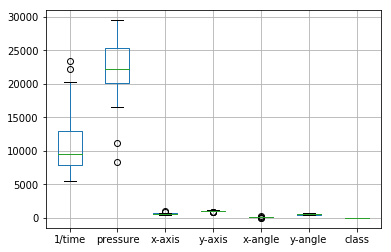

In [7]:
# box and whisker plots for each attribute
dataset.boxplot()
pyplot.show()

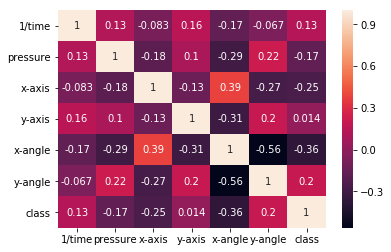

In [8]:
#Finding Correlation
sbn.heatmap(dataset[dataset.columns[0:10]].corr(),annot=True)

In [9]:
# Split-out validation dataset
X= dataset.iloc[ :, 0:6]    #coz target column chara amader 6 ta column ache. tai 0 theke 6 er ag porjonto X dhorbo.
Y= dataset.iloc[ :,-1]    #etake ebhabeo likha zabe Y= df[ "class"] karon amader target column er name "class"
validation_size = 0.30
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
test_size=validation_size, random_state=seed)

In [10]:
#feature selection
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y) 
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y) 
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = [' Specs ',' Score ']
featureScores

,Specs,Score
0,1/time,1561.251911
1,pressure,1095.263203
2,x-axis,51.570964
3,y-axis,0.028990
4,x-angle,57.926008
5,y-angle,19.635090


In [11]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'accuracy'


# Spot-Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

results = []
names = []
for name, model in models:
 kfold = KFold(n_splits=num_folds, random_state=seed)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

LR: 0.650000 (0.240947)
KNN: 0.525000 (0.276511)
CART: 0.608333 (0.223762)
NB: 0.591667 (0.275000)
SVM: 0.558333 (0.271442)


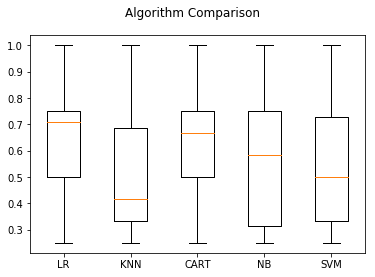

In [12]:
#comparison of algorithms using boxplot
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [13]:
# Standardize the dataset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',
LogisticRegression())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN',
KNeighborsClassifier())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART',
DecisionTreeClassifier())])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB',
GaussianNB())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC())])))
results = []
names = []
for name, model in pipelines:
 kfold = KFold(n_splits=num_folds, random_state=seed)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

ScaledLR: 0.700000 (0.256038)
ScaledKNN: 0.491667 (0.198781)
ScaledCART: 0.541667 (0.194544)
ScaledNB: 0.591667 (0.275000)
ScaledSVM: 0.633333 (0.194365)


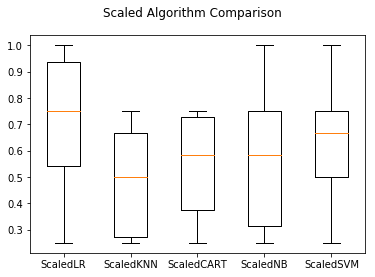

In [14]:
# Comparing Algorithms on scaled data
fig = pyplot.figure()
fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

In [15]:
# Tuning scaled KNN
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
neighbors = [1,3,5,7,9,11,13,15,17,19,21]
param_grid = dict(n_neighbors=neighbors)
model = KNeighborsClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.702703 using {'n_neighbors': 1}
0.702703 (0.194269) with: {'n_neighbors': 1}
0.648649 (0.207892) with: {'n_neighbors': 3}
0.540541 (0.197223) with: {'n_neighbors': 5}
0.648649 (0.207892) with: {'n_neighbors': 7}
0.594595 (0.207011) with: {'n_neighbors': 9}
0.648649 (0.238186) with: {'n_neighbors': 11}
0.594595 (0.207011) with: {'n_neighbors': 13}
0.594595 (0.311300) with: {'n_neighbors': 15}
0.648649 (0.319026) with: {'n_neighbors': 17}
0.594595 (0.288781) with: {'n_neighbors': 19}
0.567568 (0.296272) with: {'n_neighbors': 21}


In [16]:
# Tuning scaled SVM
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC()
kfold = KFold(n_splits=num_folds, random_state=seed)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(rescaledX, Y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
 print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.729730 using {'C': 0.5, 'kernel': 'linear'}
0.675676 (0.233931) with: {'C': 0.1, 'kernel': 'linear'}
0.540541 (0.293589) with: {'C': 0.1, 'kernel': 'poly'}
0.567568 (0.276615) with: {'C': 0.1, 'kernel': 'rbf'}
0.567568 (0.276615) with: {'C': 0.1, 'kernel': 'sigmoid'}
0.702703 (0.254495) with: {'C': 0.3, 'kernel': 'linear'}
0.486486 (0.246228) with: {'C': 0.3, 'kernel': 'poly'}
0.513514 (0.232102) with: {'C': 0.3, 'kernel': 'rbf'}
0.621622 (0.224774) with: {'C': 0.3, 'kernel': 'sigmoid'}
0.729730 (0.215229) with: {'C': 0.5, 'kernel': 'linear'}
0.459459 (0.197223) with: {'C': 0.5, 'kernel': 'poly'}
0.540541 (0.238569) with: {'C': 0.5, 'kernel': 'rbf'}
0.594595 (0.251245) with: {'C': 0.5, 'kernel': 'sigmoid'}
0.702703 (0.194269) with: {'C': 0.7, 'kernel': 'linear'}
0.540541 (0.223960) with: {'C': 0.7, 'kernel': 'poly'}
0.594595 (0.207011) with: {'C': 0.7, 'kernel': 'rbf'}
0.702703 (0.254495) with: {'C': 0.7, 'kernel': 'sigmoid'}
0.729730 (0.215229) with: {'C': 0.9, 'kernel': 'line

In [17]:
# ensembles
ensembles = []
ensembles.append(('AB', AdaBoostClassifier()))
ensembles.append(('GBM', GradientBoostingClassifier()))
ensembles.append(('RF', RandomForestClassifier()))
ensembles.append(('ET', ExtraTreesClassifier()))
results = []
names = []
for name, model in ensembles:
 kfold = KFold(n_splits=num_folds, random_state=seed)
 cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
 print(msg)

AB: 0.683333 (0.210159)
GBM: 0.633333 (0.194365)
RF: 0.600000 (0.181812)
ET: 0.625000 (0.242241)


In [18]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX = scaler.transform(X_train)
model = SVC(C=1.5)
model.fit(rescaledX, Y_train)
# estimate accuracy on validation dataset
rescaledValidationX = scaler.transform(X_validation)
predictions = model.predict(rescaledValidationX)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.5625
[[3 6]
 [1 6]]
             precision    recall  f1-score   support

          0       0.75      0.33      0.46         9
          1       0.50      0.86      0.63         7

avg / total       0.64      0.56      0.54        16

